# Exploratory Data Analysis (EDA) & Data Preparation

## 1. Load Packages and Datasets

In [76]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import os
import re
import spacy
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from IPython.display import display, HTML

# Install extra libraries
#!pip install bs4
#!pip install matplotlib

In [77]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [78]:
train_df = pd.read_json('./../data/train.json')
train_df.sample(5)

,document,full_text,tokens,trailing_whitespace,labels
4270,16967,Challenge & Selection\n\nAn issue that is prev...,"[Challenge, &, Selection, \n\n, An, issue, tha...","[True, True, False, False, True, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
278,5480,Mustafa Majid Design Thinking - Assignment L...,"[Mustafa, Majid, , Design, Thinking, -, Assig...","[True, True, False, True, True, True, True, Fa...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
5288,19391,Story Telling in Design Thinking\n\n1. CHALLEN...,"[Story, Telling, in, Design, Thinking, \n\n, 1...","[True, True, True, True, False, False, False, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
196,4486,Mind Mapping - The case of a facilitated mobil...,"[Mind, Mapping, -, The, case, of, a, facilitat...","[True, True, True, True, True, True, True, Tru...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6767,22615,Example of reflection-Storytelling\n\nChalleng...,"[Example, of, reflection, -, Storytelling, \n\...","[True, True, False, False, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [79]:
test_df = pd.read_json('./../data/test.json')
test_df.sample(5)

,document,full_text,tokens,trailing_whitespace
8,112,Reflection – Learning Launch\n\nFrancisco Ferr...,"[Reflection, –, Learning, Launch, \n\n, Franci...","[True, True, True, False, False, True, False, ..."
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,..."
7,104,Storytelling The Path to Innovation\n\nDr Sak...,"[Storytelling, , The, Path, to, Innovation, \...","[True, False, True, True, True, False, False, ..."
5,86,Cheese Startup - Learning Launch ​by Eladio Am...,"[Cheese, Startup, -, Learning, Launch, ​by, El...","[True, True, True, True, True, True, True, Fal..."


Personal Identifiable Information (PII) Named Entity Recogniser (NER) Labels using the BILOU Scheme

In [80]:
pii_labels = [
    'B-NAME_STUDENT', 'I-NAME_STUDENT',
    'B-URL_PERSONAL', 'I-URL_PERSONAL',
    'B-ID_NUM', 'I-ID_NUM',
    'B-EMAIL', 'I-EMAIL',
    'B-STREET_ADDRESS', 'I-STREET_ADDRESS',
    'B-PHONE_NUM', 'I-PHONE_NUM',
    'B-USERNAME', 'I-USERNAME'
]

## 2. Exploratory Data Analysis

In [81]:
train_df.isna().sum()

document               0
full_text              0
tokens                 0
trailing_whitespace    0
labels                 0
dtype: int64

In [82]:
test_df.isna().sum()

document               0
full_text              0
tokens                 0
trailing_whitespace    0
dtype: int64

We are able to verify that neither dataset has null values that would need to be pre-processed.

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
dtypes: int64(1), object(4)
memory usage: 266.0+ KB


In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             10 non-null     int64 
 1   full_text            10 non-null     object
 2   tokens               10 non-null     object
 3   trailing_whitespace  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


We know that the train set has 6,807 rows of data and the test set only has 10 rows.

### 2.1 Distribution of Document Length

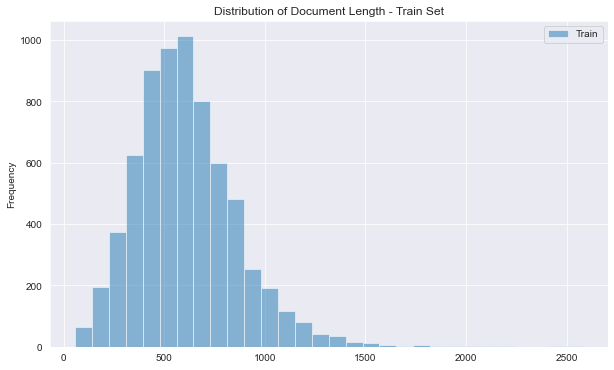

In [85]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['full_text'].apply(lambda x: len(x.split())), bins=30, alpha=0.5, label='Train')
plt.ylabel('Frequency')
plt.title('Distribution of Document Length - Train Set')
plt.legend()
plt.show()

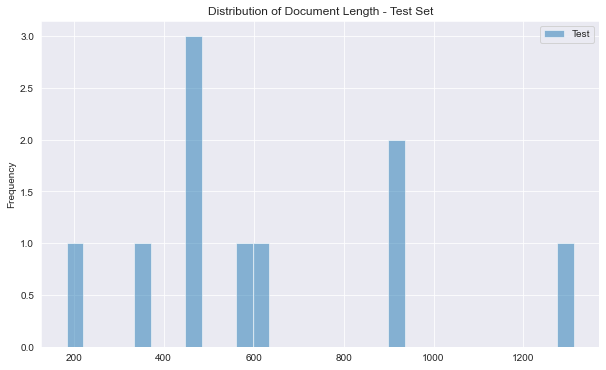

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(test_df['full_text'].apply(lambda x: len(x.split())), bins=30, alpha=0.5, label='Test')
plt.ylabel('Frequency')
plt.title('Distribution of Document Length - Test Set')
plt.legend()
plt.show()

### 2.2 Distribution of Token Lengths

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

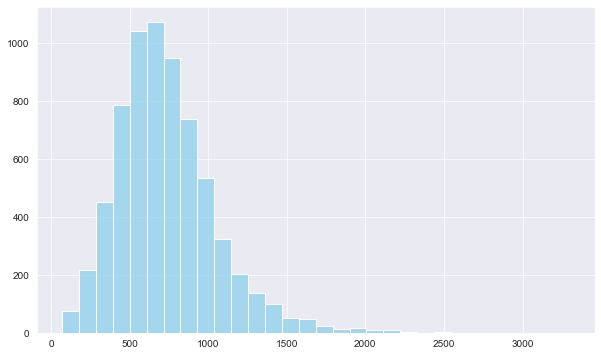

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['tokens'].apply(lambda x: len(x)), bins=30, color='skyblue', alpha=0.7, label='Train', kde=True)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths - Train Set')
plt.legend()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

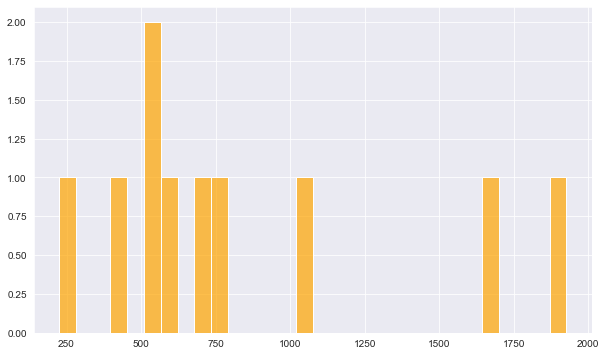

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(test_df['tokens'].apply(lambda x: len(x)), bins=30, color='orange', alpha=0.7, label='Test', kde=True)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths - Test Set')
plt.legend()
plt.show()

/var/folders/n4/d2ts14l13r9cgn49mk0zwlpw0000gn/T/ipykernel_12279/1874324433.py:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[train_df['tokens'].apply(lambda x: len(x)),


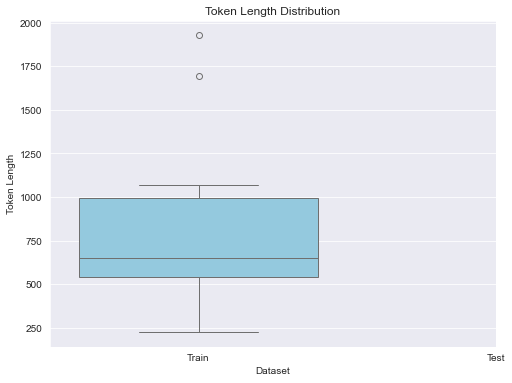

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[train_df['tokens'].apply(lambda x: len(x)),
                  test_df['tokens'].apply(lambda x: len(x))], palette=['skyblue', 'orange'])
plt.xticks([0, 1], ['Train', 'Test'])
plt.xlabel('Dataset')
plt.ylabel('Token Length')
plt.title('Token Length Distribution')
plt.show()

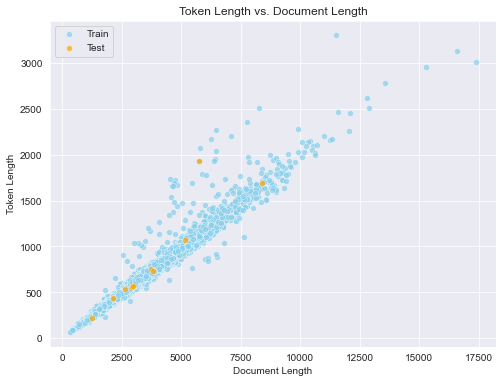

In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['full_text'].apply(lambda x: len(x)), y=train_df['tokens'].apply(lambda x: len(x)), color='skyblue', alpha=0.7, label='Train')
sns.scatterplot(x=test_df['full_text'].apply(lambda x: len(x)), y=test_df['tokens'].apply(lambda x: len(x)), color='orange', alpha=0.7, label='Test')
plt.xlabel('Document Length')
plt.ylabel('Token Length')
plt.title('Token Length vs. Document Length')
plt.legend()
plt.show()

In [93]:
train_eda = train_df.copy()

# Find documnets with high number of entities
train_eda['new_labels'] = train_eda['labels'].apply(lambda x: [item for item in x if item != 'O'])
train_eda['count_new_labels'] = train_eda['new_labels'].apply(len)
train_eda['count_distinct_new_labels'] = train_eda['new_labels'].apply(lambda x: len(set(x)))
train_eda.sort_values(by='count_distinct_new_labels', inplace=True, ascending=False)

exploded_df = train_eda['new_labels'].explode()
dummies = pd.get_dummies(exploded_df).reset_index()

frequency = dummies.sum().sort_values(ascending=False)
ordered_columns = frequency.index.tolist() ; ordered_columns.remove("index")

counted = dummies.groupby('index').sum()
counted = counted.reindex(columns=pii_labels, fill_value=0)
counted = counted[ordered_columns + [i for i in pii_labels if i not in ordered_columns]]

train_eda = train_eda.join(counted)
train_eda.head()

,document,full_text,tokens,trailing_whitespace,labels,new_labels,count_new_labels,count_distinct_new_labels,B-NAME_STUDENT,I-NAME_STUDENT,B-URL_PERSONAL,B-ID_NUM,B-EMAIL,I-STREET_ADDRESS,I-PHONE_NUM,B-PHONE_NUM,B-USERNAME,B-STREET_ADDRESS,I-ID_NUM,I-URL_PERSONAL,I-EMAIL,I-USERNAME
1103,9854,Waseem Mabunda 591 Smith Centers Apt. 656\nJo...,"[Waseem, Mabunda, , 591, Smith, Centers, Apt,...","[True, True, False, True, True, True, False, T...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-STREET_A...","[B-NAME_STUDENT, I-NAME_STUDENT, B-STREET_ADDR...",15,6,1,1,1,0,0,10,0,1,0,1,0,0,0,0
219,4777,"Assignment: Reflection on Design Thinking, Sto...","[Assignment, :, Reflection, on, Design, Thinki...","[False, True, True, True, True, False, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, I-NAME_STUDEN...",8,5,1,2,0,0,1,0,3,1,0,0,0,0,0,0
350,6243,Name: Jana Telfah Email: nbarker@hotmail.com ...,"[Name, :, Jana, Telfah, , Email, :, nbarker@h...","[False, True, True, True, False, False, True, ...","[O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-PH...",21,5,3,3,0,0,3,0,9,3,0,0,0,0,0,0
24,379,"COURSERA – University of Virginia, Darden Scho...","[COURSERA, –, University, of, Virginia, ,, Dar...","[True, True, True, True, False, True, True, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-UR...",6,4,2,2,1,0,1,0,0,0,0,0,0,0,0,0
440,7308,Md Carrillo\n\nlisarose@gmail.com\n\ndiazkrist...,"[Md, Carrillo, \n\n, lisarose@gmail.com, \n\n,...","[True, False, False, False, False, False, Fals...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-EMAIL, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-EMAIL, B-EM...",10,4,2,2,2,0,4,0,0,0,0,0,0,0,0,0


In [94]:
ner_colors = {
    'B-NAME_STUDENT': 'rgb(255, 179, 179)',
    'I-NAME_STUDENT': 'rgb(139, 0, 0)',
    'B-URL_PERSONAL': 'rgb(255, 223, 179)',
    'I-URL_PERSONAL': 'rgb(255, 140, 0)',
    'B-ID_NUM': 'rgb(255, 255, 179)',
    'I-ID_NUM': 'rgb(204, 204, 0)',
    'B-EMAIL': 'rgb(179, 255, 179)',
    'I-EMAIL': 'rgb(0, 100, 0)',
    'B-STREET_ADDRESS': 'rgb(179, 223, 255)',
    'I-STREET_ADDRESS': 'rgb(0, 0, 139)',
    'B-PHONE_NUM': 'rgb(223, 179, 255)',
    'I-PHONE_NUM': 'rgb(75, 0, 130)',
    'B-USERNAME': 'rgb(255, 179, 223)',
    'I-USERNAME': 'rgb(231, 84, 128)',
}

def generate_legend():
    legend_html = '<div class="legend" style="margin-bottom: 10px;">'
    for entity, color in ner_colors.items():
        legend_html += f'<span style="color: {color}; margin-right: 10px;">{entity}</span>'
    legend_html += '</div>'
    return legend_html

def highlight_entities(text, tokens, labels):
    legend = generate_legend()  # Generate the legend
    soup = BeautifulSoup(legend, 'html.parser')  # Start with the legend

    last_idx = 0
    for token, label in zip(tokens, labels):
        start, end = text.find(token, last_idx), text.find(token, last_idx) + len(token)

        if start != -1:
            soup.append(BeautifulSoup(text[last_idx:start], 'html.parser'))

            if label != 'O':
                token_span = soup.new_tag('span', style=f'background-color: {ner_colors.get(label, "black")}; font-family: "Tahoma"; padding: 0 2px; border-radius: 3px;')
                token_span.string = token
                soup.append(token_span)

                label_span = soup.new_tag('span', style=f'background-color: {ner_colors.get(label, "black")}; font-family: Tahoma; font-weight: bold; padding: 0 2px; border-radius: 3px;')
                label_span.string = f" [{label}]"
                soup.append(label_span)
            else:
                soup.append(token)

            last_idx = end

    soup.append(BeautifulSoup(text[last_idx:], 'html.parser'))
    return str(soup).replace('\n', '<br/>')

def label_color(label):
    return ner_colors.get(label, 'black')

In [95]:
sample_train = train_eda.sample(1)

sample_train.loc[:, 'html'] = sample_train.apply(lambda x: highlight_entities(x['full_text'], x['tokens'], x['labels']), axis=1)
for html in sample_train['html']:
    display(HTML(html))

In [96]:
num_documents = train_eda.shape[0]
ner_labels_data = train_eda[pii_labels].melt(var_name='ner_label', value_name='count')
ner_labels_stat = ner_labels_data.groupby('ner_label').agg(
    doc_count=pd.NamedAgg(column='count', aggfunc=lambda x: (x > 0).sum()),
    ner_count=pd.NamedAgg(column='count', aggfunc="sum"),
).reset_index()
ner_labels_stat['doc_count_percentage'] = np.round(ner_labels_stat['doc_count']/num_documents,4)
ner_labels_stat['ner_count_percentage'] = np.round(ner_labels_stat['ner_count']/sum(ner_labels_stat['ner_count']),4)

ner_labels_stat = ner_labels_stat.sort_values('doc_count', ascending=False)

In [97]:
ner_labels_stat

,ner_label,doc_count,ner_count,doc_count_percentage,ner_count_percentage
2,B-NAME_STUDENT,891,1365,0.1309,0.4984
9,I-NAME_STUDENT,814,1096,0.1196,0.4001
5,B-URL_PERSONAL,72,110,0.0106,0.0402
1,B-ID_NUM,33,78,0.0048,0.0285
0,B-EMAIL,24,39,0.0035,0.0142
6,B-USERNAME,5,6,0.0007,0.0022
3,B-PHONE_NUM,4,6,0.0006,0.0022
10,I-PHONE_NUM,3,15,0.0004,0.0055
4,B-STREET_ADDRESS,2,2,0.0003,0.0007
11,I-STREET_ADDRESS,2,20,0.0003,0.0073


In [98]:
def plot_ner_distribution(ner_labels_stat, count_col, percentage_col):
    plt.figure(figsize=(12, 6))

    # Define colors
    unique_labels = ner_labels_stat['ner_label'].unique()
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
    color_dict = dict(zip(unique_labels, colors))

    # Plot bars for counts
    for label, color in zip(unique_labels, colors):
        subset = ner_labels_stat[ner_labels_stat['ner_label'] == label]
        plt.bar(subset['ner_label'], subset[count_col], color=color, label=label)

    # Set y-axis label and rotate x-axis labels
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Plot percentage on secondary y-axis
    sec_axis = plt.twinx()
    sec_axis.plot(ner_labels_stat['ner_label'], ner_labels_stat[percentage_col], color='red', marker='o')

    # Set secondary y-axis label
    sec_axis.set_ylabel('Percentage')

    # Title and labels
    plt.title('NER Label Distribution')
    plt.xlabel('NER Label')

    # Add legend
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

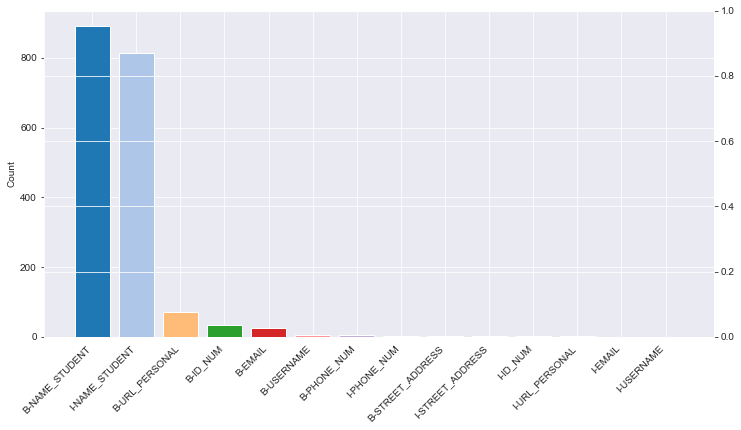

In [99]:
plot_ner_distribution(ner_labels_stat, 'doc_count', 'doc_count_percentage')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

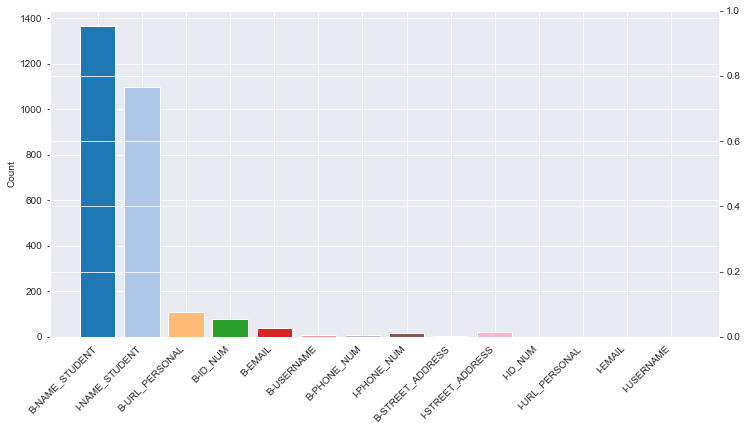

In [100]:
plot_ner_distribution(ner_labels_stat, 'ner_count', 'ner_count_percentage')

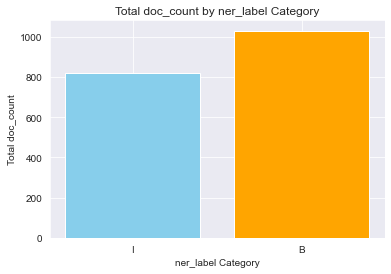

In [102]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'ner_label' and 'doc_count' columns

# Create two separate DataFrames based on ner_label starting with "I" or "B"
ner_label_i = ner_labels_stat[ner_labels_stat['ner_label'].str.startswith('I')]
ner_label_b = ner_labels_stat[ner_labels_stat['ner_label'].str.startswith('B')]

# Calculate the sum of doc_count for each category
sum_doc_count_i = ner_label_i['doc_count'].sum()
sum_doc_count_b = ner_label_b['doc_count'].sum()

# Plotting
categories = ['I', 'B']
sums = [sum_doc_count_i, sum_doc_count_b]

plt.bar(categories, sums, color=['skyblue', 'orange'])
plt.xlabel('ner_label Category')
plt.ylabel('Total doc_count')
plt.title('Total doc_count by ner_label Category')
plt.show()

## 3. Pre-Processing

In [ ]:
from string import punctuation
from nltk.corpus import stopwords

PUNCTUATION = set(punctuation)
STOPWORDS = set(stopwords.words("english"))

# Train Set Pre-Processing
def lowercase(tokens):
    return [token.lower() for token in tokens]

def remove_stopwords(tokens, labels):
    return zip(*[(token, label) for token, label in zip(tokens, labels) if token.lower() not in STOPWORDS])

def remove_punctuation(tokens, labels):
    return zip(*[(token, label) for token, label in zip(tokens, labels) if token not in PUNCTUATION])

def remove_empty_and_newline(tokens, labels):
    return zip(*[(token, label) for token, label in zip(tokens, labels) if token.strip() != '' and token.strip() != ' \n\n'])

def preprocess(tokens, labels):
    tokens = lowercase(tokens)
    tokens, labels = remove_stopwords(tokens, labels)
    tokens, labels = remove_punctuation(tokens, labels)
    tokens, labels = remove_empty_and_newline(tokens, labels)
    return list(tokens), list(labels)

In [ ]:
train_df['tokens_processed'], train_df['labels_processed'] = zip(*train_df.apply(lambda row: preprocess(row['tokens'], row['labels']), axis=1))
train_df['tokens_count'] = train_df['tokens'].map(len)
train_df.head()

In [ ]:
# Test Set Pre-Processing for EDA
def lowercase(tokens):
    return [token.lower() for token in tokens]

def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english"))
    return [token for token in tokens if token.lower() not in stop_words]

def remove_punctuation(tokens):
    return [''.join(ch for ch in token if ch not in PUNCTUATION) for token in tokens]

def remove_empty_and_newline(tokens):
    return [token for token in tokens if token.strip() != '' and token.strip() != ' \n\n']

def preprocess(tokens):
    tokens = lowercase(tokens)
    tokens = remove_punctuation(tokens)
    tokens = remove_stopwords(tokens)
    tokens = remove_empty_and_newline(tokens)
    return tokens

In [ ]:
test_df['tokens_processed'] = test_df['tokens'].apply(preprocess)
test_df['tokens_count'] = test_df['tokens'].map(len)
test_df.head()

In [ ]:
def descriptive_stats(tokens, top_tokens=5, verbose=True):
    """
    Calculate descriptive statistics for a list of tokens.
    Args:
        tokens (list): List of tokens.
        top_tokens (int): Number of top tokens to display.
        verbose (bool): Print statistics if True.
    Returns:
        list: A list containing [num_tokens, num_unique_tokens, lexical_diversity, num_characters]
    """
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(len(token) for token in tokens)
    token_counter = Counter(tokens)
    most_common_tokens = token_counter.most_common(top_tokens)

    if verbose:
        print(f"Number of tokens: {num_tokens}")
        print(f"Number of unique tokens: {num_unique_tokens}")
        print(f"Number of characters: {num_characters}")
        print(f"Lexical diversity: {lexical_diversity:.3f}")
        print(f"Most common tokens (Top {top_tokens}):")
        for token, count in most_common_tokens:
            print(f" - {token}: {count}")

    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

In [ ]:
train_tokens = train_df['tokens_processed'].sum()
train_stats = descriptive_stats(train_tokens)

In [ ]:
test_tokens = test_df['tokens_processed'].sum()
test_stats = descriptive_stats(test_tokens)

In [ ]:
from wordcloud import WordCloud

# Wordcloud for test_df
all_tokens = ' '.join([token for sublist in test_df['tokens'] for token in sublist])
wordcloud = WordCloud(width=800, height=400).generate(all_tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_tokens = ' '.join([token for sublist in train_df['tokens'] for token in sublist])
wordcloud = WordCloud(width=800, height=400).generate(all_tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
train_df['token_length'] = train_df['tokens'].apply(len)
train_df['token_length'].hist(bins=20)

In [ ]:
test_df['token_length'] = test_df['tokens'].apply(len)
test_df['token_length'].hist(bins=10)

In [ ]:
# Store pre-processed data for modeling work
train_df.to_json('./../data' + '/preprocess_train.json')
test_df.to_json('./../data' + '/preprocess_test.json')